In [1]:
import numpy as np
import download_data as dl
import matplotlib.pyplot as plt
import sklearn.svm as svm
from sklearn import metrics
from conf_matrix import func_confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

In [2]:
## step 1: load data from csv file. 
data = dl.download_data('crab.csv').values
n = 200
#split data 
np.random.seed(0)
S = np.random.permutation(n)
#100 training samples
Xtr = data[S[:100], :6]
Ytr = data[S[:100], 6:]
# 100 testing samples
X_test = data[S[100:], :6]
Y_test = data[S[100:], 6:].ravel()

In [3]:
## step 2 randomly split Xtr/Ytr into two even subsets: use one for training, another for validation.
#############placeholder 1: training/validation #######################
n2 = len(Xtr)
np.random.seed(0)
S2 = np.random.permutation(n2)       
# subsets for training models
x_train= Xtr[S2[:50], :6]
y_train= Ytr[S2[:50]].flatten()
# subsets for validation
x_validation= Xtr[S2[50:], :6]
y_validation= Ytr[S2[50:]].flatten()

#############placeholder end #######################

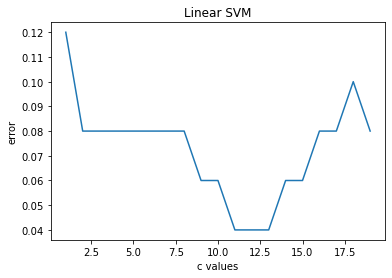

In [4]:
# 3.1 Plot the validation errors while using different values of C ( with other hyperparameters fixed) 
#  keeping kernel = "linear"
#############placeholder 2: Figure 1#######################

c_range =  range(1,20)
svm_c_error = []
for c_value in c_range:
    model = svm.SVC(kernel='linear', C=c_value)
    model.fit(X=x_train, y=y_train)
    np.random.seed(0)
    error = 1. - model.score(x_validation, y_validation)
    svm_c_error.append(error)
plt.plot(c_range, svm_c_error)
plt.title('Linear SVM')
plt.xlabel('c values')
plt.ylabel('error')
#plt.xticks(c_range)
plt.show()
#############placeholder end #######################

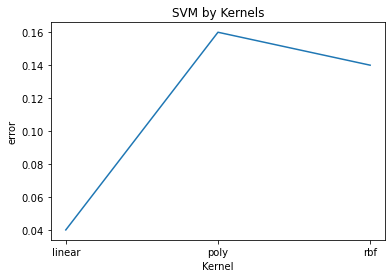

In [5]:
# 3.2 Plot the validation errors while using linear, RBF kernel, or Polynomial kernel ( with other hyperparameters fixed) 
#############placeholder 3: Figure 2#######################
kernel_types = ['linear', 'poly', 'rbf']
svm_kernel_error = []
for kernel_value in kernel_types:
    
    # your own codes
    model = svm.SVC(kernel=kernel_value, C = 11) # change kernl type, C
    model.fit(X=x_train, y=y_train.ravel())
    error = 1. - model.score(x_validation, y_validation) 
    svm_kernel_error.append(error)
    
plt.plot(kernel_types, svm_kernel_error)
plt.title('SVM by Kernels')
plt.xlabel('Kernel')
plt.ylabel('error')
plt.xticks(kernel_types)
plt.show()
#############placeholder end #######################

In [6]:
## step 4 Select the best model and apply it over the testing subset 
#############placeholder 4:testing  #######################
# write your own codes to select the best hyper-parameters: kernel and C.
#After trying manytimes, my best kernal is linear and c = 10

#linear kernal 
print("Parameter Selection for kernal linear")
for i in range (5,20):
    model = svm.SVC(kernel = 'linear', C = i, gamma= 10) # change kernl type, C, gamma 
    model.fit(X=x_train, y=y_train.ravel())
    error = 1. - model.score(x_validation, y_validation) 
    print('c: ',i, 'error: ', error)

#Polynomial kernel  
print("Parameter Selection for Polynomial linear")

for i in range (5,20):
    model = svm.SVC(kernel = 'poly', C = i, gamma= 0.001) # change kernl type, C, gamma 
    model.fit(X=x_train, y=y_train.ravel())
    error = 1. - model.score(x_validation, y_validation) 
    print('c: ',i, 'error: ', error)

# RBF kernel 
print("Parameter Selection for RBF linear")
for i in range (5,20):
    model = svm.SVC(kernel = 'rbf', C = i, gamma= 0.001) # change kernl type, C, gamma 
    model.fit(X=x_train, y=y_train.ravel())
    error = 1. - model.score(x_validation, y_validation) 
    print('c: ',i, 'error: ', error)

print("My best score is linear kernal with c = 11 ") # 
best_kernel = 'linear'
best_c = 11 # kernal with liner, c = 11 shows "best" performance (lowest error)
model = svm.SVC(kernel=best_kernel, C=best_c)
model.fit(X=x_train, y=y_train.ravel()) #fit the model
y_pred = model.predict(X_test)
#############placeholder end #######################

Parameter Selection for kernal linear
c:  5 error:  0.07999999999999996
c:  6 error:  0.07999999999999996
c:  7 error:  0.07999999999999996
c:  8 error:  0.07999999999999996
c:  9 error:  0.06000000000000005
c:  10 error:  0.06000000000000005
c:  11 error:  0.040000000000000036
c:  12 error:  0.040000000000000036
c:  13 error:  0.040000000000000036
c:  14 error:  0.06000000000000005
c:  15 error:  0.06000000000000005
c:  16 error:  0.07999999999999996
c:  17 error:  0.07999999999999996
c:  18 error:  0.09999999999999998
c:  19 error:  0.07999999999999996
Parameter Selection for Polynomial linear
c:  5 error:  0.16000000000000003
c:  6 error:  0.16000000000000003
c:  7 error:  0.16000000000000003
c:  8 error:  0.16000000000000003
c:  9 error:  0.16000000000000003
c:  10 error:  0.16000000000000003
c:  11 error:  0.14
c:  12 error:  0.09999999999999998
c:  13 error:  0.07999999999999996
c:  14 error:  0.07999999999999996
c:  15 error:  0.07999999999999996
c:  16 error:  0.079999999999999

In [7]:
## step 5 evaluate your results in terms of accuracy, real, or precision. 

#############placeholder 5: metrics #######################
# func_confusion_matrix is provided in conf_matrix.py
# You might re-use this function from previous homework assignment.
y_pred = model.predict(X_test)
conf_matrix, accuracy, recall_array, precision_array = func_confusion_matrix(Y_test, y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("Average Accuracy: {}".format(accuracy))
print("Per-Class Precision: {}".format(precision_array))
print("Per-Class Recall: {}".format(recall_array))

#############placeholder end #######################

Confusion Matrix: 
[[47  2]
 [ 2 49]]
Average Accuracy: 0.96
Per-Class Precision: [0.95918367 0.96078431]
Per-Class Recall: [0.95918367 0.96078431]


In [8]:
#############placeholder 6: success and failure examples #######################
# Success samples: samples for which you model can correctly predict their labels
count = 0

print("Successful examples")
feast = []
for i in range(0,100):
    if Y_test[i]==y_pred[i]:
        print("Y_actual:" ,Y_test[i], "Y_hat:" , "Feature:",y_pred[i], X_test[i])
        count = count+1
        a = [Y_test[i]]
        a.append(y_pred[i])
        a.extend(X_test[i])
        feast.append(a)
    if count ==5: break

# Failure samples: In my model, there are only 4 predicted valued that is incorrect.
print("\n")

print("Failure examples")

feasf = []
count = 0
for i in range(0,100):
    if Y_test[i]!=y_pred[i]:
        print("Y_actual:" ,Y_test[i], "y_hat:" ,y_pred[i], "Feature:", X_test[i] )
        b = [Y_test[i]]
        b.append(y_pred[i])
        b.extend(X_test[i])
        feasf.append(b)
        count = count +1
    if count ==5: break


Successful examples
Y_actual: 1.0 Y_hat: Feature: 1.0 [ 0.  14.  12.8 28.8 32.4 12.7]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 0.  18.2 13.7 38.8 42.7 17.2]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 0.  13.2 11.  27.1 30.4 12.2]
Y_actual: -1.0 Y_hat: Feature: -1.0 [ 0.  20.6 14.4 42.8 46.5 19.6]
Y_actual: 1.0 Y_hat: Feature: 1.0 [ 1.  10.3  9.5 21.3 24.7  8.9]


Failure examples
Y_actual: -1.0 y_hat: 1.0 Feature: [ 0.  10.7  8.6 20.7 22.7  9.2]
Y_actual: -1.0 y_hat: 1.0 Feature: [ 1.   8.1  6.7 16.1 19.   7. ]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 0.  18.5 14.6 37.  42.  16.6]
Y_actual: 1.0 y_hat: -1.0 Feature: [ 1.   9.5  8.2 19.6 22.4  7.8]


In [9]:
# Average value of each feature
import pandas as pd
xdf = pd.DataFrame(X_test)
print("Average value of each features: ")
print(xdf.mean(axis = 0),'\n')
print("Meadian of each features: ")
xdf.median(axis = 0) 

Average value of each features: 
0     0.450
1    15.647
2    12.736
3    32.210
4    36.443
5    14.082
dtype: float64 

Meadian of each features: 


0     0.00
1    15.60
2    12.90
3    31.70
4    36.30
5    13.85
dtype: float64

In [10]:
sum1 = feast + feasf # combine dataframe (sucessful cases and failure case)

In [11]:
#Rename index and column of table
summary = pd.DataFrame(sum1, columns = ['Y_actual', 'Y_hat', 'f1','f2','f3','f4','f5','f6' ], 
                       index = np.repeat(['Success', 'Failure'], [5, 4], axis=0) )

In [12]:
#Sumarize statistics of features
mea = pd.DataFrame(xdf.mean(axis = 0), columns = ['mean']).T #mean
med = pd.DataFrame(xdf.median(axis = 0), columns = ['median']).T #meandian
sum3 = pd.concat([mea, med]) #comebine table
sum3.columns = ['f1','f2','f3','f4','f5','f6'] # rename columns
sum3.insert(0, "Y_actual",['-','-'] ) #insert Na for Y actual
sum3.insert(1, "Y_hat",['-','-'] ) 
 # combine the table mean and meandian with the table summary of success and failure cases
summary1 = pd.concat([summary,sum3]) 

In [13]:
summary1

,Y_actual,Y_hat,f1,f2,f3,f4,f5,f6
Success,1,1,0.00,14.000,12.800,28.80,32.400,12.700
Success,-1,-1,0.00,18.200,13.700,38.80,42.700,17.200
Success,-1,-1,0.00,13.200,11.000,27.10,30.400,12.200
Success,-1,-1,0.00,20.600,14.400,42.80,46.500,19.600
Success,1,1,1.00,10.300,9.500,21.30,24.700,8.900
Failure,-1,1,0.00,10.700,8.600,20.70,22.700,9.200
Failure,-1,1,1.00,8.100,6.700,16.10,19.000,7.000
Failure,1,-1,0.00,18.500,14.600,37.00,42.000,16.600
Failure,1,-1,1.00,9.500,8.200,19.60,22.400,7.800
mean,-,-,0.45,15.647,12.736,32.21,36.443,14.082


<function matplotlib.pyplot.show(*args, **kw)>

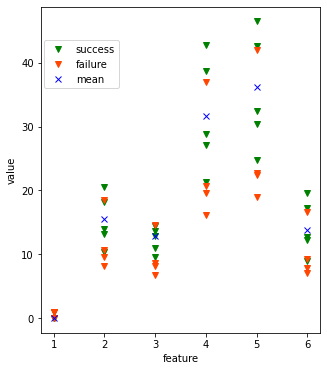

In [14]:
#visulize the value of feature of success and failure 
plt.figure(figsize=(5,6))

# plot the feature value of success example
plt.plot(np.arange(1,7,1), summary1.iloc[ 0 , 2: ] , "v", label="success", c = 'green')
for i in range (1,5,1): 
    plt.plot(np.arange(1,7,1), summary1.iloc[ i , 2: ] , "v",  c = 'green')

# plot the feature value of failure example
plt.plot(np.arange(1,7,1), summary1.iloc[ 5 , 2: ] , "v", label="failure", c = 'orangered')
for i in range (1,4,1): 
    plt.plot(np.arange(1,7,1), summary1.iloc[ i+5 , 2: ] , "v", c = 'orangered')
# plot the mean value of each feature
plt.plot(np.arange(1,7,1), summary1.iloc[ 10 , 2: ] , "x", label="mean", c = 'blue') 

plt.xlabel("feature")
plt.ylabel("value")
xlims = plt.xlim()
plt.xlim(xlims)
plt.legend(loc= (0.01,0.75))

plt.show

In [15]:
#############placeholder end #######################